# Aprendizado: setando o batch size

## O objetivo é avaliar o impacto da variação do batch size de uma MLP em um problema de classificação simples.

## Importando as bibliotecas

In [17]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from numpy import where
# Dataset
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Modelo
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

In [18]:
n_classes=3
n_features=2
X, y = make_blobs(n_samples=1000, centers=n_classes, n_features=n_features, cluster_std=2, random_state=2)

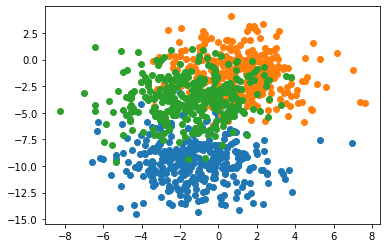

In [19]:
for class_value in range(n_classes):
    #retorna os índices onde a condição y==class_value é atendida
    row_ix = where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

## Criando o conjunto de treino e teste

In [20]:
def create_dataset():
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    y_categorical = to_categorical(y)
    # divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.30, shuffle = True, random_state=42)
    return X_train, y_train, X_test, y_test

In [21]:
X_train, y_train, X_test, y_test = create_dataset()

In [22]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(700, 2) (700, 3) (300, 2) (300, 3)


## Avaliando a capacidade do modelo

In [23]:
def model_training(n_nodes, n_layers, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(n_nodes, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return model, history

In [24]:
def model_evaluation(model,X_test, y_test):
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return test_acc

camadas=1; nós=1: 0.803
camadas=1; nós=2: 0.833
camadas=1; nós=3: 0.813
camadas=1; nós=4: 0.837
camadas=1; nós=5: 0.850
camadas=1; nós=6: 0.843


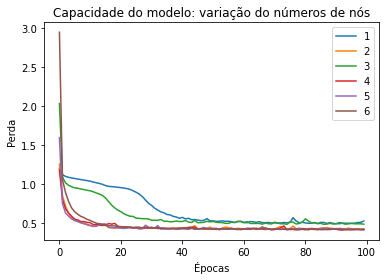

camadas=2; nós=1: 0.327
camadas=2; nós=2: 0.330
camadas=2; nós=3: 0.843
camadas=2; nós=4: 0.810
camadas=2; nós=5: 0.823
camadas=2; nós=6: 0.843


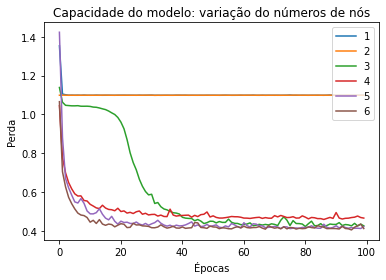

camadas=3; nós=1: 0.327
camadas=3; nós=2: 0.787
camadas=3; nós=3: 0.343
camadas=3; nós=4: 0.837
camadas=3; nós=5: 0.833
camadas=3; nós=6: 0.850


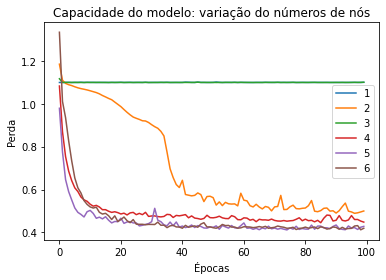

In [25]:
for n_layers in range(1,4):
    for n_nodes in range(1,7):
        
        model, history = model_training(n_nodes, n_layers, X_train, y_train)
        test_acc = model_evaluation(model,X_test, y_test)
    
        print('camadas=%d; nós=%d: %.3f' % (n_layers, n_nodes, test_acc))
        plt.plot(history.history['loss'], label=str(n_nodes))

    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Capacidade do modelo: variação do números de nós')    
    plt.legend()
    plt.show()

## Definido a capacidade do modelo e avaliando os tipos de batch size

In [26]:
def model_training(batch_approach, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    if batch_approach == "batch":
        batch_size=len(X_train)
    elif batch_approach == "stochastic":
        batch_size=1
    else: batch_size=32
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(5, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0,batch_size=batch_size)
    return model, history

Batch: batch, Treino: 0.787, Teste: 0.827
Batch: minibatch, Treino: 0.820, Teste: 0.840
Batch: stochastic, Treino: 0.334, Teste: 0.330


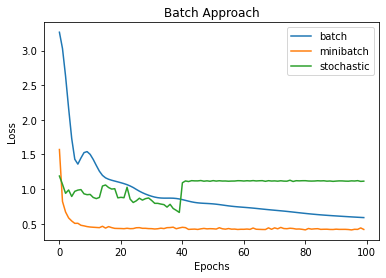

In [27]:
# evaluate model with a given number of nodes
batch_approach = ["batch","minibatch","stochastic"]
for i in batch_approach:
    model, history = model_training(i,X_train, y_train)
    train_acc = model_evaluation(model, X_train, y_train)
    test_acc = model_evaluation(model,X_test, y_test)
    # exibe a acurácia de treino e teste do modelo para cada tipo de abordagem batch
    print('Batch: %s, Treino: %.3f, Teste: %.3f' % (i, train_acc, test_acc))
    
    # plota a curva de perda para cada tipo de batch size
    plt.plot(history.history['loss'], label=i)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch Approach')    
plt.legend()
plt.show()

## Variando o tamanho do minibatch

In [11]:
def model_training(batch_approach, n_batch, X_train, y_train, X_test, y_test):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    if batch_approach == "batch":
        batch_size=len(X_train)
    elif batch_approach == "stochastic":
        batch_size=1
    else: batch_size=n_batch
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(6, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0,batch_size=batch_size, validation_data=(X_test, y_test))
    
    # plotando as curvas de aprendizado
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch),pad=-10)
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    
    return model, history

N_Batch: 8, Treino: 0.541, Teste: 0.570
N_Batch: 16, Treino: 0.764, Teste: 0.707
N_Batch: 32, Treino: 0.856, Teste: 0.823
N_Batch: 64, Treino: 0.954, Teste: 0.930


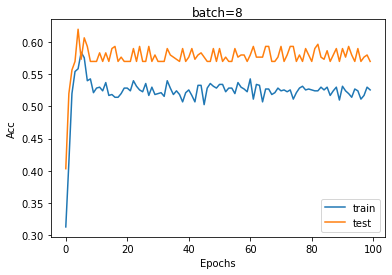

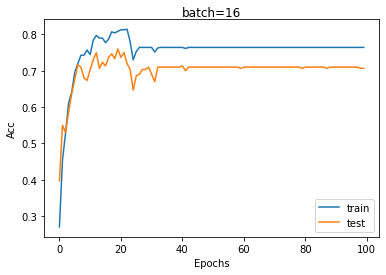

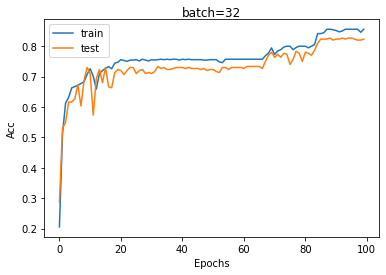

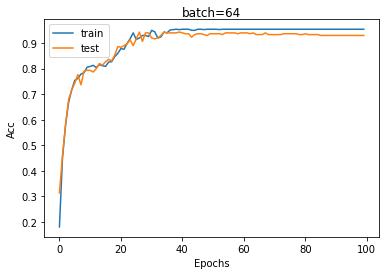

In [15]:
batch_approach = "minibatch"
n_batch = [8, 16, 32, 64]
for i in range(len(n_batch)):
    
    plt.subplots(1,1)
               
    model, history = model_training(batch_approach, n_batch[i], X_train, y_train, X_test, y_test)
    train_acc = model_evaluation(model, X_train, y_train)
    test_acc = model_evaluation(model,X_test, y_test)
    # exibe a acurácia de treino e teste do modelo para cada tipo de abordagem batch
    print('N_Batch: %s, Treino: %.3f, Teste: %.3f' % (n_batch[i], train_acc, test_acc))
    
plt.show()

Atividade(0.5): Realizar a avaliação do impacto do batch size no aprendizado da MLP: 
<ol>
        <li> Definir um range de batch size com valores maiores e verificar se a acurária permance aumentando gradualmentente. </li>
        <li> Avaliar o efeito de diferentes valores de taxa de aprendizado (crescer exponencialmente) com o gradiente descendente estocástico. </li>
        <li> Avaliar o número de épocas necessárias para a convergência do algoritmo de treinamento à medida que o batch size aumenta com a abordagem mini batch. </li>  
</ol>